In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 2

(b) Plot the region of absolute stability to check A-stability

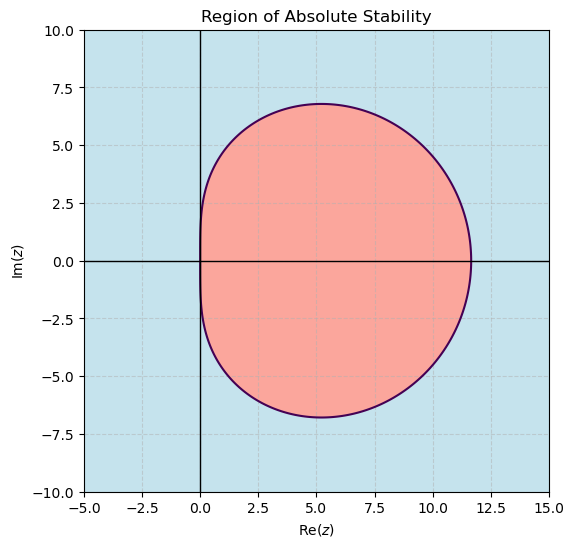

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def stability_function(z):
    gamma = 1.0 + 1.0 / np.sqrt(2)
    gamma = 1.0 - 1.0 / np.sqrt(2)
    num = 2*z+z**2-4*z**2*gamma+2-4*z*gamma+2*z**2*gamma**2
    denom = 2*(1-z*gamma)**2
    return num / denom

x = np.linspace(-5, 15, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
RZ = stability_function(Z)

plt.figure(figsize=(6, 6))
plt.contour(X, Y, abs(RZ), levels=[1])
plt.contourf(X, Y, abs(RZ), levels=[-np.inf, 1], colors="lightblue", alpha=0.7)
plt.contourf(X, Y, abs(RZ), levels=[1, np.inf], colors="salmon", alpha=0.7)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.xlabel(r'Re($z$)')
plt.ylabel(r'Im($z$)')
plt.title('Region of Absolute Stability')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [3]:
# Stiff Robertson's problem from chemical kinetics as in
# https://archimede.uniba.it/~testset/report/rober.pdf
import numpy as np
import matplotlib.pyplot as plt
import time

a = 0.04
b = 1.0e4
c = 3.0e7

# timestep, Tmax, tolearnce for Newton's solver
h = 1.0e-3
Tmax = 1.0e2 # up to 4.0e10
Nsteps = int(np.ceil(Tmax/h))
tol = 1.0e-14
itermax = 20

# initial condition
y0 = np.array([1.0,0.0,0.0])

# the right-hand side
def func(y): 
    dy = np.zeros(3)
    byz = b*y[1]*y[2]
    cy2 = c*y[1]*y[1]
    ax = a*y[0]
    dy[0] = -ax + byz
    dy[1] = ax - byz - cy2
    dy[2] = cy2
    return dy

# the Jacobian matrix for the right-hand side
def Jac(y):
    by = b*y[1]
    bz = b*y[2]
    c2y = 2*c*y[1]
    Jac = np.zeros((3,3))
    Jac[0,0] = -a
    Jac[0,1] = bz
    Jac[0,2] = by
    Jac[1,0] = a
    Jac[1,1] = -bz-c2y
    Jac[1,2] = -by
    Jac[2,1] = c2y
    return Jac


In [4]:
# DIRK2

def NewtonIterDIRK2(y,h,k,gamma):
    aux = y + h*gamma*k
    F = k - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k - np.linalg.solve(DF,F)

def DIRK2step(y,h):
    gamma = 1.0 - 1.0/np.sqrt(2)
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK2(y,h,k1,gamma)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    # print( np.linalg.norm(k1 - func(y + h*gamma*k1)))
    # print(j)
    k2 = k1
    y = y + h*(1-gamma)*k1
    for j in range(itermax):
        k2 = NewtonIterDIRK2(y,h,k2,gamma)
        aux = y + h*gamma*k2
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    # print( np.linalg.norm(k2 - func(aux)))
    # print(j)
    return aux


In [5]:
# DIRKo3

def NewtonIterDIRKo3(y,h,k,gamma):
    aux = y + h*gamma*k
    F = k - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k - np.linalg.solve(DF,F)

def DIRKo3step(y,h):
    gamma = 1.0/2 + np.sqrt(3)/6.0
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK2(y,h,k1,gamma)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    # print( np.linalg.norm(k1 - func(y + h*gamma*k1)))
    # print(j)
    k2 = k1
    # y_aux = y + h*(1-2*gamma)*k1
    y_aux = y + h*1/2*k1
    for j in range(itermax):
        k2 = NewtonIterDIRK2(y_aux,h,k2,gamma)
        # aux = y_aux + h*gamma*k2
        aux = y_aux + h*1/2*k2
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    # y_output = y + h*(1-gamma)*k1 + h*gamma*k2
    y_output = aux
    # print( np.linalg.norm(k2 - func(aux)))
    # print(j)
    return y_output

In [6]:
# solve Robertson's problem

sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0

start_time = time.time()

method_name = "DIRK2"
for j in range(Nsteps): # DIRK2
    sol[j+1,:] = DIRK2step(sol[j,:],h)

end_time = time.time()
t_cpu = end_time - start_time

print(f'method = {method_name:5}, CPUtime = {t_cpu:.6e}')
  

method = DIRK2, CPUtime = 8.301027e+00


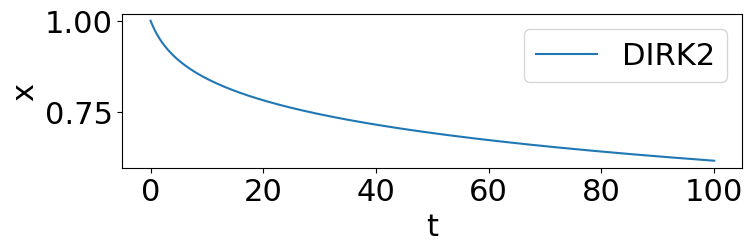

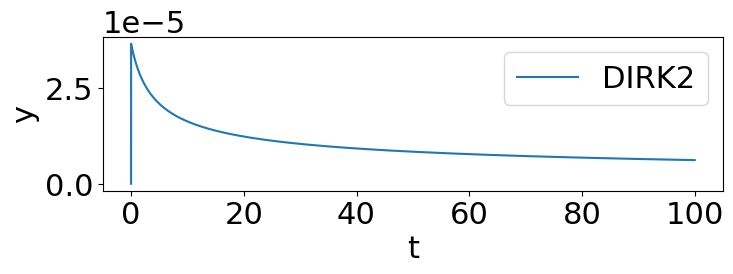

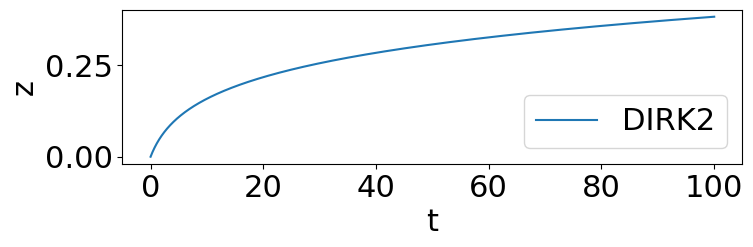

In [7]:
# plot the solution
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,0],label = "DIRK2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,1],label = "DIRK2")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,2],label = "DIRK2")
plt.xlabel("t")
plt.ylabel("z")
plt.legend()
#plt.xscale("log")


In [8]:
# solve Robertson's problem

sol_o3 = np.zeros((Nsteps+1,3))
t_o3 = np.arange(0,(Nsteps+1)*h,h)
sol_o3[0,:] = y0

start_time = time.time()

method_name = "DIRKo3"
for j in range(Nsteps): # DIRK3
    sol_o3[j+1,:] = DIRKo3step(sol_o3[j,:],h)

end_time = time.time()
t_cpu = end_time - start_time

print(f'method = {method_name:5}, CPUtime = {t_cpu:.6e}')
  

method = DIRKo3, CPUtime = 7.768990e+01


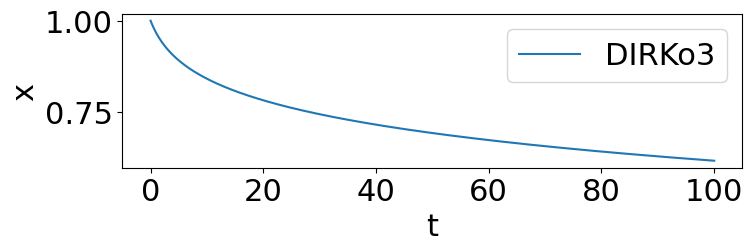

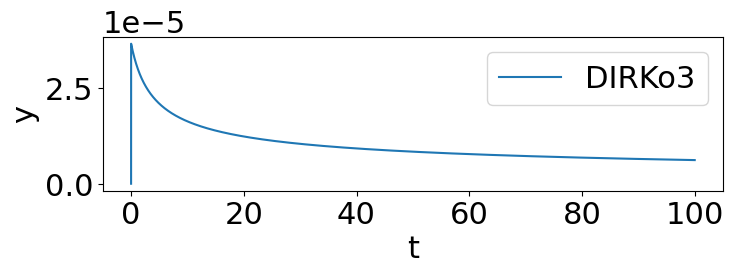

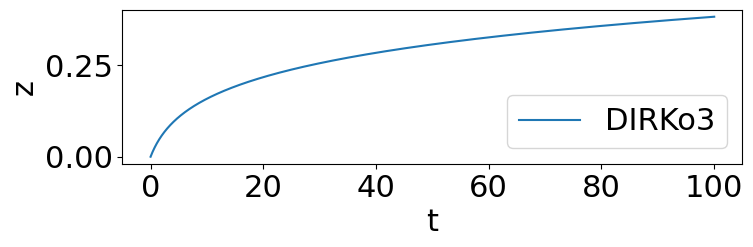

In [9]:
# plot the solution
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t_o3,sol_o3[:,0],label = "DIRKo3")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t_o3,sol_o3[:,1],label = "DIRKo3")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
#plt.xscale("log")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t_o3,sol_o3[:,2],label = "DIRKo3")
plt.xlabel("t")
plt.ylabel("z")
plt.legend()
#plt.xscale("log")


In [10]:
def BDF2(y1, y2, y3, h):
    alpha1, alpha2, beta = 4 / 3, -1 / 3, 2 / 3
    F = y3 - (alpha1 * y2 + alpha2 * y1) - h * beta * func(y3)
    DF = np.identity(3) - h * beta * Jac(y3)
    delta = np.linalg.solve(DF, F)
    return y3-delta

def BDF2step(y1, y2, h):
    alpha1, alpha2, beta = 4 / 3, -1 / 3, 2 / 3
    y3 = y2
    for j in range(20):
        y3 = BDF2(y1, y2, y3, h)
        if np.linalg.norm(y3 - (alpha1 * y2 + alpha2 * y1) - h * beta * func(y3)) < 1.0e-14:
            break
    return y3

In [11]:
# solve Robertson's problem

sol_bdf = np.zeros((Nsteps+2,3))
t_bdf = np.arange(0,(Nsteps+2)*h,h)
sol_bdf[0,:] = y0
sol_bdf[1,:] = DIRK2step(sol_bdf[0,:],h)

start_time = time.time()

method_name = "BDF2"
for j in range(Nsteps): # DIRK3
    sol_bdf[j+2,:] = BDF2step(sol_bdf[j,:],sol_bdf[j+1,:],h)

end_time = time.time()
t_cpu = end_time - start_time

print(f'method = {method_name:5}, CPUtime = {t_cpu:.6e}')

method = BDF2 , CPUtime = 5.214001e+00


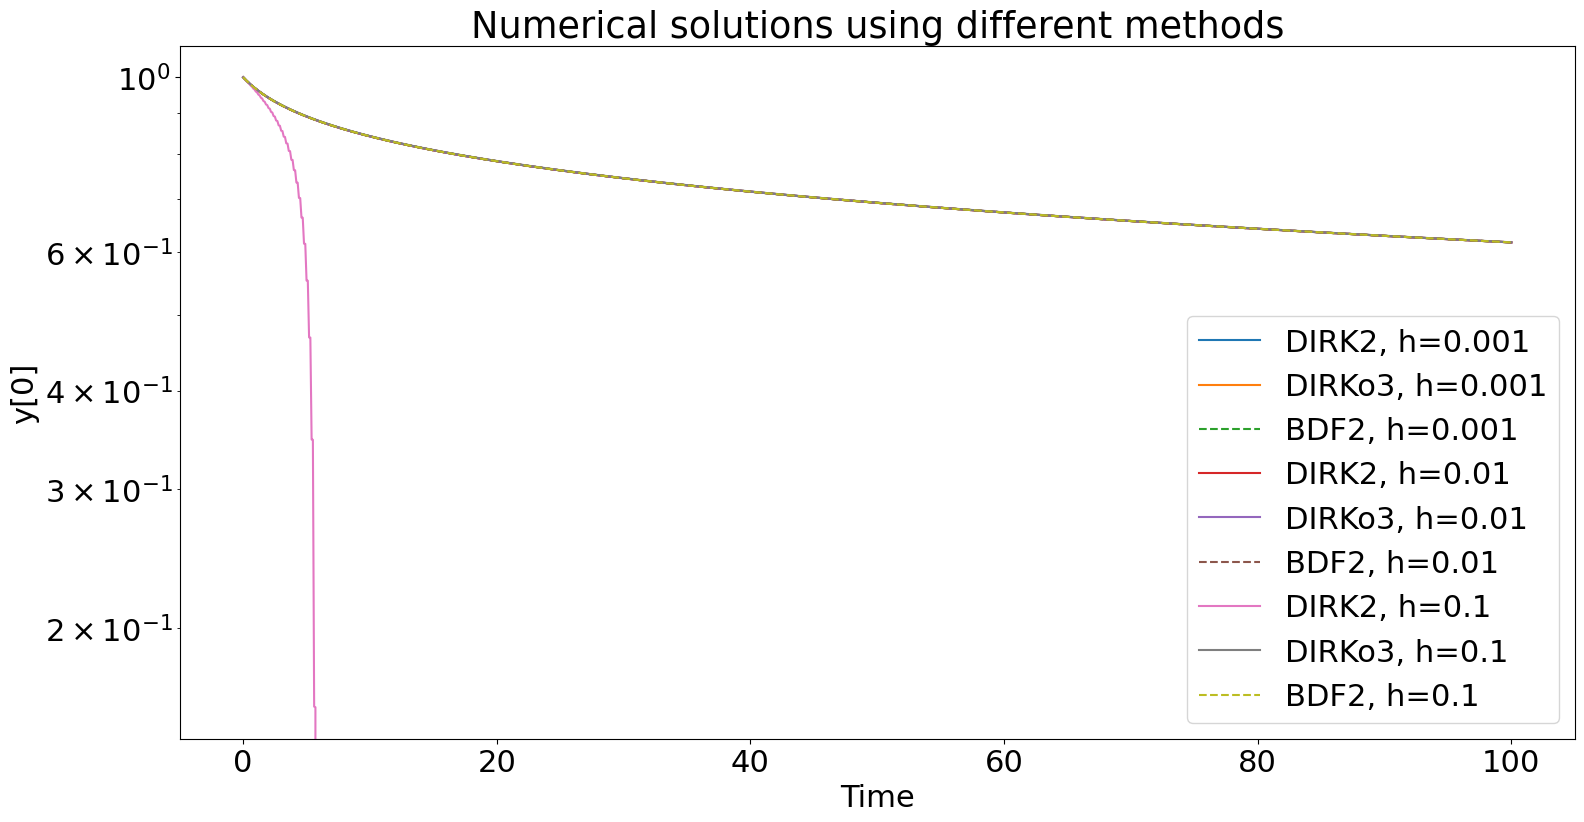

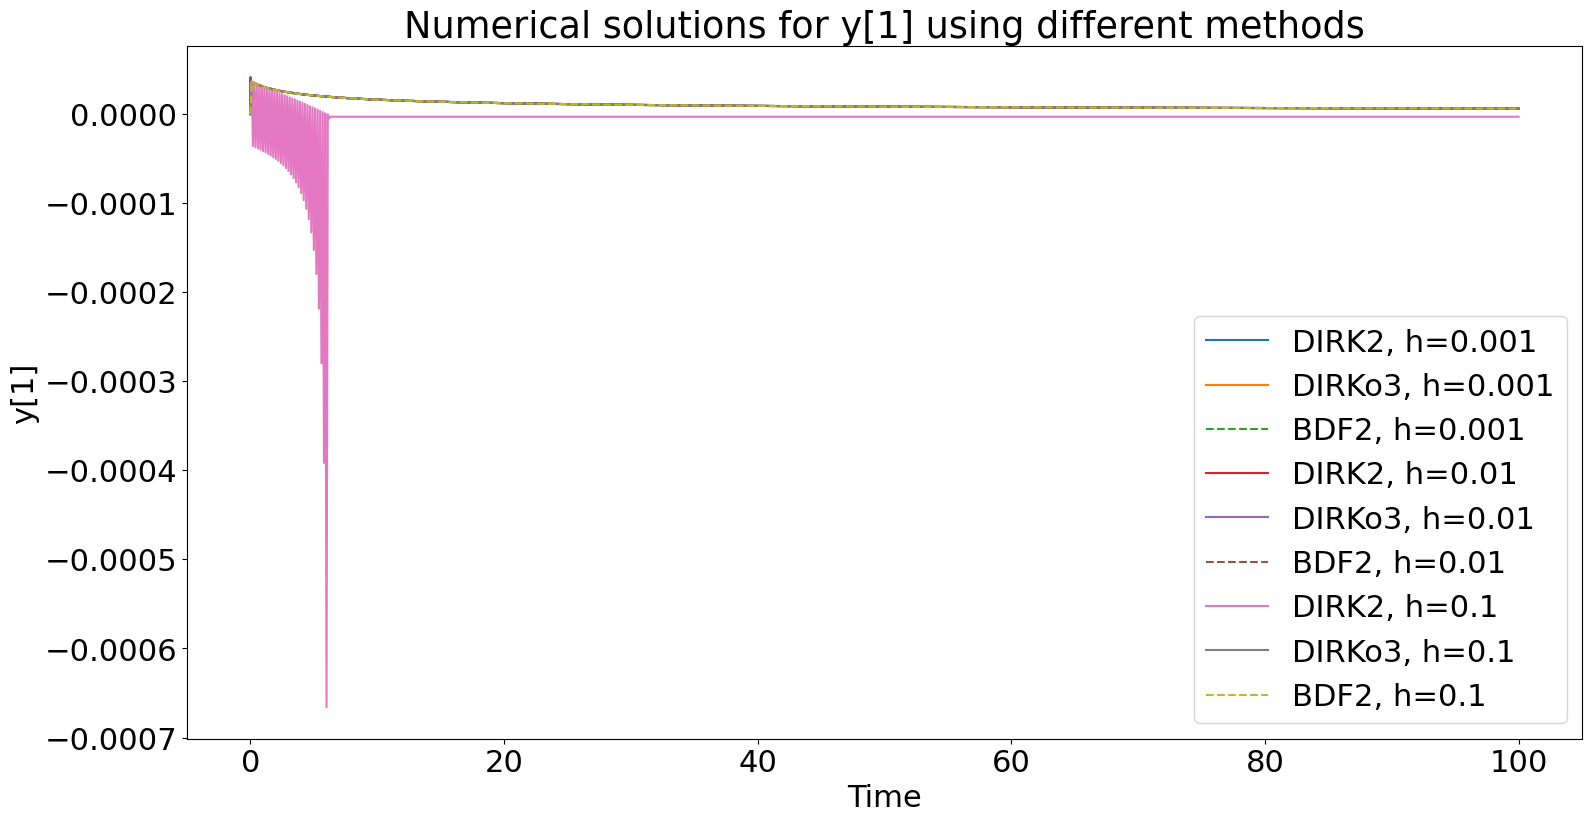

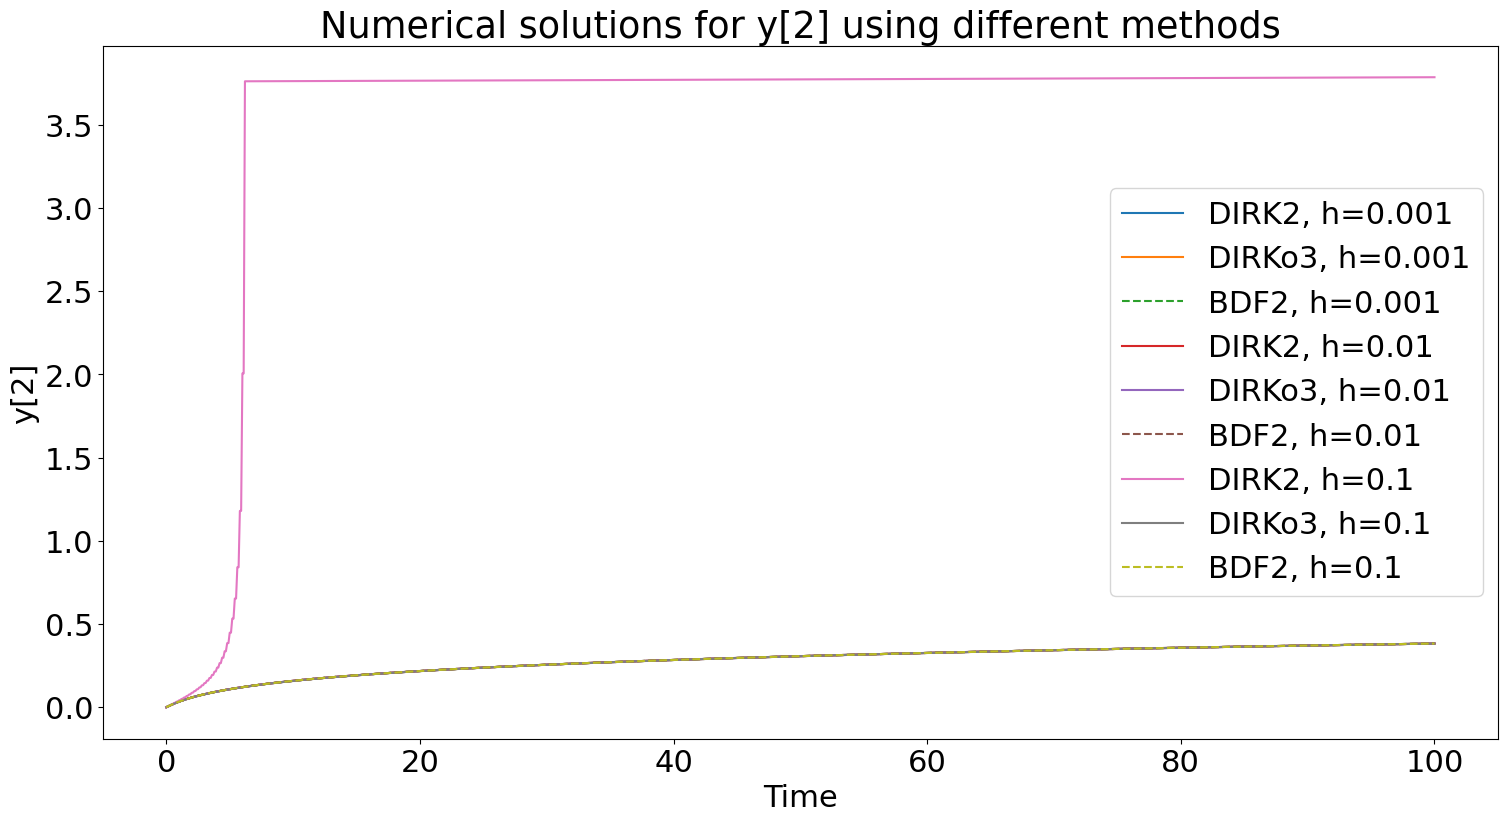

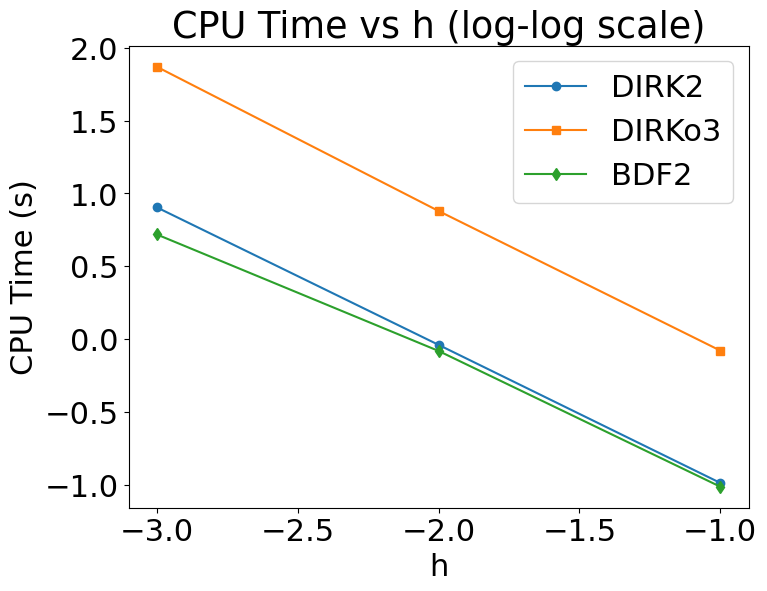

In [12]:
h_values = [1e-3, 1e-2, 1e-1]
# h_values = [1e-1]
Tmax = 100
results = {}

for h in h_values:
    Nsteps = int(np.ceil(Tmax/h))
    t = np.arange(0, (Nsteps + 1) * h, h)

    # Solve with DIRK2
    sol = np.zeros((Nsteps + 1, 3))
    sol[0, :] = y0
    start_time = time.time()
    for j in range(Nsteps):
        sol[j + 1, :] = DIRK2step(sol[j, :], h)
    t_cpu_dirk2 = time.time() - start_time

    # Solve with DIRKo3
    sol_o3 = np.zeros((Nsteps + 1, 3))
    sol_o3[0, :] = y0
    start_time = time.time()
    for j in range(Nsteps):
        sol_o3[j + 1, :] = DIRKo3step(sol_o3[j, :], h)
    t_cpu_dirko3 = time.time() - start_time

    # Solve with BDF2
    sol_bdf2 = np.zeros((Nsteps + 1, 3))
    sol_bdf2[0, :] = y0
    sol_bdf2[1, :] = DIRK2step(sol_bdf2[0, :], h)  # Use DIRK2 for first step
    start_time = time.time()
    for j in range(1, Nsteps):
        sol_bdf2[j + 1, :] = BDF2step(sol_bdf2[j - 1, :], sol_bdf2[j, :], h)
    t_cpu_bdf2 = time.time() - start_time

    results[h] = {
        "t": t,
        "DIRK2": sol,
        "DIRKo3": sol_o3,
        "BDF2": sol_bdf2,
        "CPU_DIRK2": t_cpu_dirk2,
        "CPU_DIRKo3": t_cpu_dirko3,
        "CPU_BDF2": t_cpu_bdf2
    }

plt.figure(figsize=(18, 9))
for h in h_values:
    plt.plot(results[h]["t"], results[h]["DIRK2"][:, 0], label=f'DIRK2, h={h}')
    plt.plot(results[h]["t"], results[h]["DIRKo3"][:, 0], label=f'DIRKo3, h={h}')
    plt.plot(results[h]["t"], results[h]["BDF2"][:, 0], label=f'BDF2, h={h}', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("y[0]")
plt.legend()
plt.title("Numerical solutions using different methods")
plt.yscale('log')
plt.show()

plt.figure(figsize=(18, 9))
for h in h_values:
    plt.plot(results[h]["t"], results[h]["DIRK2"][:, 1], label=f'DIRK2, h={h}')
    plt.plot(results[h]["t"], results[h]["DIRKo3"][:, 1], label=f'DIRKo3, h={h}')
    plt.plot(results[h]["t"], results[h]["BDF2"][:, 1], label=f'BDF2, h={h}', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("y[1]")
plt.legend()
plt.title("Numerical solutions for y[1] using different methods")
plt.show()

plt.figure(figsize=(18, 9))
for h in h_values:
    plt.plot(results[h]["t"], results[h]["DIRK2"][:, 2], label=f'DIRK2, h={h}')
    plt.plot(results[h]["t"], results[h]["DIRKo3"][:, 2], label=f'DIRKo3, h={h}')
    plt.plot(results[h]["t"], results[h]["BDF2"][:, 2], label=f'BDF2, h={h}', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("y[2]")
plt.legend()
plt.title("Numerical solutions for y[2] using different methods")
plt.show()

plt.figure(figsize=(8, 6))
h_values_log = np.log10(h_values)
cpu_times_dirk2 = [results[h]["CPU_DIRK2"] for h in h_values]
cpu_times_dirko3 = [results[h]["CPU_DIRKo3"] for h in h_values]
cpu_times_bdf2 = [results[h]["CPU_BDF2"] for h in h_values]

plt.plot(np.log10(h_values), np.log10(cpu_times_dirk2), 'o-', label="DIRK2")
plt.plot(np.log10(h_values), np.log10(cpu_times_dirko3), 's-', label="DIRKo3")
plt.plot(np.log10(h_values), np.log10(cpu_times_bdf2), 'd-', label="BDF2")
plt.xlabel("h")
plt.ylabel("CPU Time (s)")
plt.legend()
plt.title("CPU Time vs h (log-log scale)")
plt.show()

# Problem 4

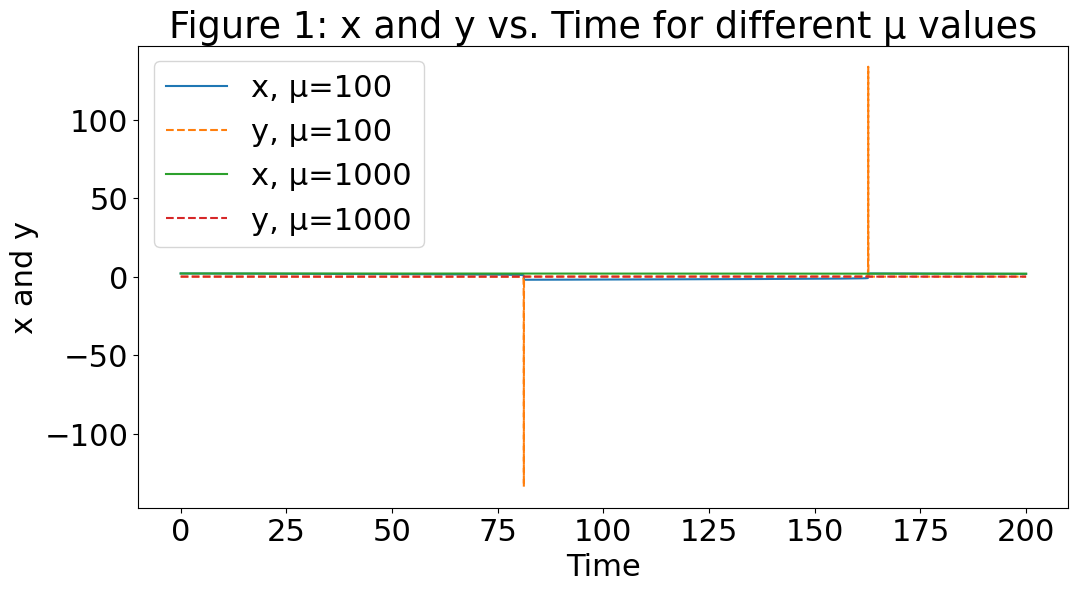

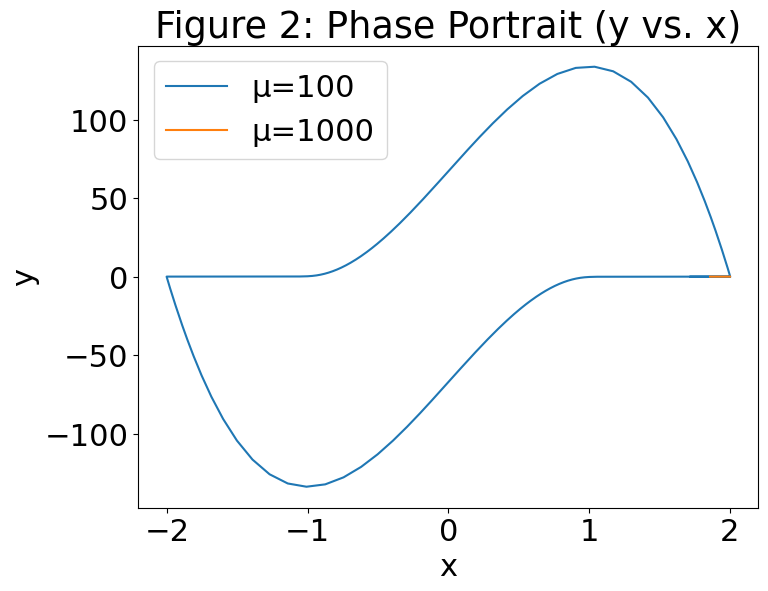

μ = 100, CPU Time = 33.097154 seconds
μ = 1000, CPU Time = 33.515136 seconds


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import fsolve

y0 = np.array([2.0, 0.0])  # (x, y)

def func(y, mu):
    x, v = y
    dxdt = v
    dvdt = mu * (1 - x**2) * v - x
    return np.array([dxdt, dvdt])

def Jac(y, mu):
    x, v = y
    J = np.array([
        [0, 1],
        [-2 * mu * x * v - 1, mu * (1 - x**2)]
    ])
    return J

gamma = 1 - 1 / np.sqrt(2)

def NewtonIterDIRK2(y, h, k, gamma, mu):
    aux = y + h * gamma * k
    F = k - func(aux, mu)
    DF = np.identity(2) - h * gamma * Jac(aux, mu)
    return k - np.linalg.solve(DF, F)

def DIRK2_step(y, h, mu):
    gamma = 1.0 - 1.0 / np.sqrt(2)
    k1 = func(y, mu)

    for _ in range(20):
        k1_new = NewtonIterDIRK2(y, h, k1, gamma, mu)
        if np.linalg.norm(k1_new - k1) < 1e-14:
            break
        k1 = k1_new

    k2 = func(y + h * (1 - 2 * gamma) * k1, mu)

    for _ in range(20):
        k2_new = NewtonIterDIRK2(y + h * (1 - 2 * gamma) * k1, h, k2, gamma, mu)
        if np.linalg.norm(k2_new - k2) < 1e-14:
            break
        k2 = k2_new

    return y + h * (0.5 * k1 + 0.5 * k2)

mu_values = [100, 1000]
Tmax = 200
h = 1e-3
initial_condition = np.array([2.0, 0.0])

results = {}

for mu in mu_values:
    Nsteps = int(Tmax / h)
    t = np.linspace(0, Tmax, Nsteps + 1)
    sol = np.zeros((Nsteps + 1, 2))
    sol[0, :] = initial_condition
    start_time = time.time()
    for j in range(Nsteps):
        sol[j + 1, :] = DIRK2_step(sol[j, :], h, mu)
    cpu_time = time.time() - start_time
    results[mu] = {"t": t, "sol": sol, "cpu_time": cpu_time}

plt.figure(figsize=(12, 6))
for mu in mu_values:
    t = results[mu]["t"]
    sol = results[mu]["sol"]
    plt.plot(t, sol[:, 0], label=f'x, μ={mu}')
    plt.plot(t, sol[:, 1], label=f'y, μ={mu}', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("x and y")
plt.legend()
plt.title("Figure 1: x and y vs. Time for different μ values")
plt.show()

plt.figure(figsize=(8, 6))
for mu in mu_values:
    sol = results[mu]["sol"]
    plt.plot(sol[:, 0], sol[:, 1], label=f'μ={mu}')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Figure 2: Phase Portrait (y vs. x)")
plt.show()

for mu in mu_values:
    print(f'μ = {mu}, CPU Time = {results[mu]["cpu_time"]:.6f} seconds')


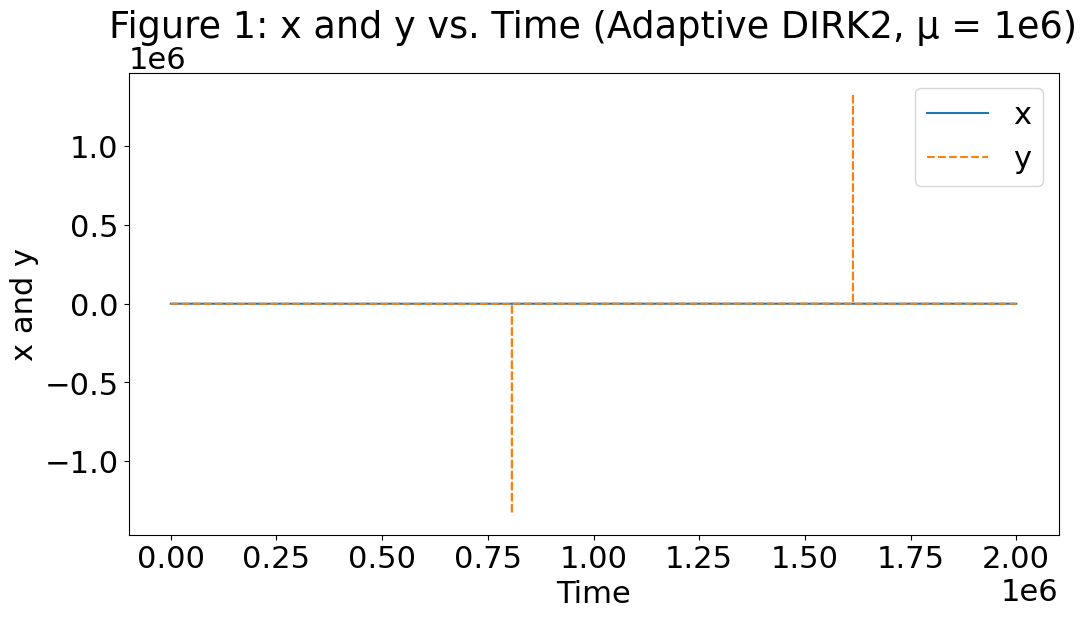

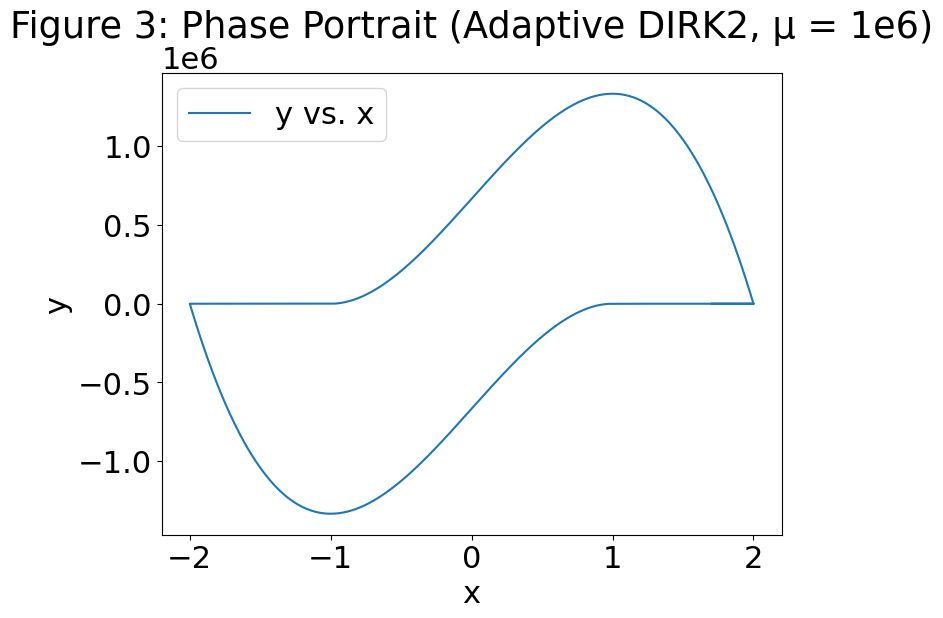

Adaptive DIRK2 solver completed in 3.818030 seconds


In [ ]:
b_star = np.array([1, 0])

gamma = 1 - 1 / np.sqrt(2)

b_star = np.array([1, 0])

def DIRK2step(y, h, mu):
    gamma = 1.0 - 1.0 / np.sqrt(2)
    k1 = func(y, mu)

    for _ in range(20):
        k1_new = NewtonIterDIRK2(y, h, k1, gamma, mu)
        if np.linalg.norm(k1_new - k1) < 1e-14:
            break
        k1 = k1_new

    k2 = func(y + h * (1 - 2 * gamma) * k1, mu)

    for _ in range(20):
        k2_new = NewtonIterDIRK2(y + h * (1 - 2 * gamma) * k1, h, k2, gamma, mu)
        if np.linalg.norm(k2_new - k2) < 1e-14:
            break
        k2 = k2_new

    return y + h * (0.5 * k1 + 0.5 * k2)

def DIRK2_adaptive_step(y, h, mu, atol=1e-5, rtol=1e-5):
    gamma = 1.0 - 1.0 / np.sqrt(2)
    k1 = func(y, mu)

    for _ in range(20):
        k1_new = NewtonIterDIRK2(y, h, k1, gamma, mu)
        if np.linalg.norm(k1_new - k1) < 1e-14:
            break
        k1 = k1_new

    k2 = func(y + h * (1 - 2 * gamma) * k1, mu)

    for _ in range(20):
        k2_new = NewtonIterDIRK2(y + h * (1 - 2 * gamma) * k1, h, k2, gamma, mu)
        if np.linalg.norm(k2_new - k2) < 1e-14:
            break
        k2 = k2_new

    y_dirk2 = y + h * (0.5 * k1 + 0.5 * k2)
    y_star = y + h * (b_star[0] * k1 + b_star[1] * k2)
    e = y_dirk2 - y_star
    error_norm = np.linalg.norm(e)
    tolerance = atol + rtol * np.linalg.norm(y_dirk2)

    if error_norm < tolerance:
        h_new = h * 2.0
    elif error_norm > tolerance:
        h_new = h / 2.0
    else:
        h_new = h

    return y_dirk2, h_new

mu = 1e6
Tmax = 2 * 1e6
h = 1e-3
atol = 1e-5
rtol = 1e-5
initial_condition = np.array([2.0, 0.0])

t = [0]
sol = [initial_condition]
cpu_start = time.time()

while t[-1] < Tmax:
    z_next, h_new = DIRK2_adaptive_step(sol[-1], h, mu, atol, rtol)
    sol.append(z_next)
    t.append(t[-1] + h)
    h = min(h_new, Tmax - t[-1])

cpu_time = time.time() - cpu_start

sol = np.array(sol)
t = np.array(t)

plt.figure(figsize=(12, 6))
plt.plot(t, sol[:, 0], label='x')
plt.plot(t, sol[:, 1], label='y', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("x and y")
plt.legend()
plt.title("Figure 1: x and y vs. Time (Adaptive DIRK2, μ = 1e6)")
plt.show()

# Plot phase portrait (Figure 3)
plt.figure(figsize=(8, 6))
plt.plot(sol[:, 0], sol[:, 1], label='y vs. x')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Figure 3: Phase Portrait (Adaptive DIRK2, μ = 1e6)")
plt.show()

print(f'Adaptive DIRK2 solver completed in {cpu_time:.6f} seconds')
